In [57]:
"""2024 sub 1"""

# 1.

from scipy.stats import hypergeom, norm, geom, expon, randint, uniform
from matplotlib.pyplot import hist, xticks, plot
from numpy import mean, linspace, floor
import numpy


# estimata -> simulari cu 1000 si impartit rez la 1000
#          -> cu mean

#teoretica -> cu fct cdf... sau formula


rosii = 7
albastre = 5
verzi = 3

nr_bile = 15
extrageri = 3

bile = ["rosu"] * 7 + ["albastru"] * 5 + ["verde"] * 3

# fara revenire

# ESTIMARE

ctr_albastre = 0
ctr_aceeasi_culoare = 0
ctr_B_A = 0

for _ in range (1000):
    
    bila1, bila2, bila3 = numpy.random.choice(bile, size=3, replace=False)
    bile_extrase = [bila1, bila2, bila3]
    
    if "albastru" in bile_extrase:
        ctr_albastre += 1
        if bila1 == bila2 == bila3:
            ctr_B_A += 1
        
    if bila1 == bila2 == bila3:
        ctr_aceeasi_culoare += 1
        
probA = ctr_albastre/1000
probB = ctr_aceeasi_culoare/1000
probC = ctr_B_A/1000
print(probA)
print(probB)
print(probC)


# TEORETICA

cel_putin_1_albastra = 1 - hypergeom.cdf(0, nr_bile, albastre, extrageri)
print(cel_putin_1_albastra)

# sau
cel_putin_1_albastra_negare = 1 - hypergeom.pmf(0, nr_bile, albastre, extrageri)
print(cel_putin_1_albastra_negare)



toate_3_rosii = hypergeom.pmf(3, nr_bile, rosii, extrageri)
toate_3_albastre = hypergeom.pmf(3, nr_bile, albastre, extrageri)
toate_3_verzi = hypergeom.pmf(3, nr_bile, verzi, extrageri)
toate_aceeasi_culoare = toate_3_verzi + toate_3_rosii + toate_3_albastre
print(toate_aceeasi_culoare)


toate_albastre = hypergeom.pmf(3, nr_bile, albastre, extrageri)
print(toate_albastre)

0.727
0.11
0.023
0.7362637362637363
0.7362637362637363
0.1010989010989011
0.02197802197802198


In [159]:
#2.

X_zaruri = []

for _ in range(1000):
    zar1, zar2 = numpy.random.randint(1,7, size=2)
    ctr = 1
    while zar1 + zar2 != 6:
        zar1, zar2 = numpy.random.randint(1,7, size=2)
        ctr += 1
    X_zaruri.append(ctr-1)
    
zaruri_estimata_4 = [x for x in X_zaruri if x > 4]  
print(len(zaruri_estimata_4) / 1000)

zaruri_estimata_7_10 = [x for x in X_zaruri if 7 <= x <= 10]
print(len(zaruri_estimata_7_10) / 1000)


ctr_zaruri=0
for _ in range(1000):
    zar1, zar2 = numpy.random.randint(1,7, size=2)
    if zar1 + zar2 == 6:
        ctr_zaruri += 1
prob_6 = ctr_zaruri/1000


zaruri_teoretica_4 = 1 - geom.cdf(5, prob_6) # prob ca a 5 a sa fie cea cu succes, adica x > 4
print(zaruri_teoretica_4)
        
        
zaruri_teoretica_7_10 = geom.cdf(11, prob_6) - geom.cdf(7, prob_6) # succes >= 11 -> X >= 10
print(zaruri_teoretica_7_10)                                       # succes > 6   -> X >= 7



0.441
0.146
0.4676983299682991
0.1572065671877767


In [237]:
# 224_2

from scipy.stats import uniform 

# [1,2]
vector = uniform.rvs(loc=1, scale=1, size=6)

# a)

ctr_medie_y1_y3_mare_y2 = 0
medii_geometrice = []
prob_apar_interval = 0

for _ in range(1000):
    y1, y2, y3 = numpy.random.choice(vector, size=3)
    if (y1+y3)/2 > y2:
        ctr_medie_y1_y3_mare_y2 += 1
    media = (y1 * y2 * y3) ** (1/3)    
    medii_geometrice.append(media)    
    
    if 1.2 <= y1 <= 1.6 and 1.2 <= y2 <= 1.6 and 1.2 <= y3 <= 1.6:
        prob_apar_interval += 1
    
print("Prob ca y1+y3/2 > y2: ", ctr_medie_y1_y3_mare_y2/1000)  
media_geometrica = mean(medii_geometrice)
print("media: ", media_geometrica)



# b)

print("prob estimata apartine interval: ", prob_apar_interval/1000)

cdf_upper = uniform.cdf(1.6, loc=1, scale=1)
cdf_lower = uniform.cdf(1.2, loc=1, scale=1)

probabilitate_unu = cdf_upper - cdf_lower

probabilitate_trei = probabilitate_unu ** 3

print(probabilitate_trei)



Prob ca y1+y3/2 > y2:  0.458
media:  1.4793874264723899
prob estimata apartine interval:  0.295
0.06400000000000007


In [284]:
# 223_2
from scipy.stats import binom

# 1.

# cu revenire

nr_acumulatori = 10

acumulatori = ["bun"] * 7 + ["rau"] * 3
ctr_a = 0
ctr_b = 0


for _ in range(5000):
    ac1, ac2, ac3 = numpy.random.choice(acumulatori, size=3, replace=True)
    acs = [ac1, ac2, ac3]
    if acs.count("rau") == 1:
        ctr_a += 1
    if acs.count("rau") == 0:
        ctr_b += 1
        
print(ctr_a/5000)
print(ctr_b/5000)
    
teoretic_b = binom.pmf(0, 3, 3/10)
print(teoretic_b)
    
    

# 2.

media_1 = -1
deviatia_1 = 1

media_2 = 0
deviatia_2 = 1
ctr_el_interval = 0
ctr_toate = 0

for _ in range(5000):
    numere_1 = norm.rvs(loc=media_1, scale=deviatia_1, size=2)
    numere_2 =  norm.rvs(loc=media_2, scale=deviatia_2, size=3)
    numere = list(numere_1) + list(numere_2)
    in_interval = [x for x in numere if -2 <= x <= 2]
    if len(in_interval) >= 3:
        ctr_el_interval += 1
    if len(in_interval) == 5:
        ctr_toate += 1
        
    
print("Prob in interval: ", ctr_el_interval/5000)    
print("Prob toate in interval: ", ctr_toate/5000)   


#teoretic

prob_1 = norm.cdf(2, loc=media_1, scale=deviatia_1) - norm.cdf(-2, loc=media_1, scale=deviatia_1)
prob_2 = norm.cdf(2, loc=media_2, scale=deviatia_2) - norm.cdf(-2, loc=media_2, scale=deviatia_2)

prob_toate = prob_1 * prob_2
print("Prob toate in interval teoretic: " ,prob_toate)

0.439
0.3434
0.3429999999999999
Prob in interval:  0.9942
Prob toate in interval:  0.6148
Prob toate in interval teoretic:  0.8017748607796518


16


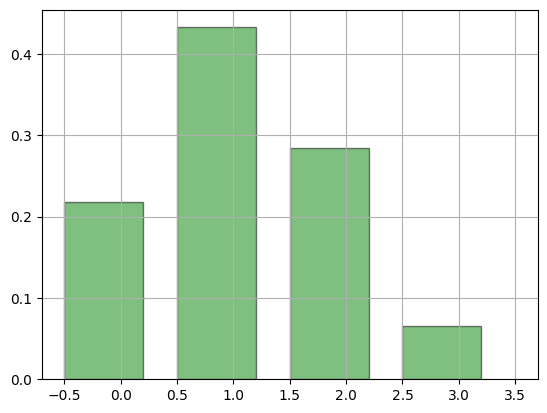

Estimare P(2):  0.2847
0.2906764539808019


In [6]:
# urna 4 bile albe 6 negre
# se arunca 4 zaruri. daca suma < 12 se face extragere fara returnare, altfel cu returnare (3 bile)
# Y = nr bile albe extrase
# 10000 simulari Y + hist
# P(Y = 2)

from scipy.stats import randint, hypergeom, binom
from numpy import random, mean
from matplotlib.pyplot import hist, grid, show, legend
from itertools import permutations
import numpy

Y = []
sample_size = 10000

urna = ['alba']*4 + ['neagra']*6

#suma_zaruri = sum(randint.rvs(low=1,high=7,size=4))
suma_zaruri = sum(numpy.random.randint(1, 7, size=4))

print(suma_zaruri)
for _ in range(sample_size):
    if suma_zaruri < 12:
        bile_extrase = list(random.choice(urna, size=3, replace=False))
        Y.append(bile_extrase.count('alba'))
    else:
        bile_extrase = list(random.choice(urna, size=3, replace=True))
        Y.append(bile_extrase.count('alba'))

bin_edges = [k + 0.5 for k in range(-1,4)]
hist(Y, bin_edges, density=True, width=0.7, alpha=0.5, color='green', edgecolor='black', label='frecvente')

grid()
show()
    
# p estimata
y_2 = [y for y in Y if y == 2]
print('Estimare P(2): ', len(y_2)/len(Y))

zar = [1, 2, 3, 4, 5, 6] * 4

lista_sume = list(permutations(zar, 4))
sume = [sum(list(s)) for s in lista_sume]
numar_sume_mai_mici_12 = len([s for s in sume if s < 12])

p = numar_sume_mai_mici_12/len(lista_sume)

print(hypergeom.pmf(2,10,4,3) * p + binom.pmf(2,3,4/10) * (1-p))

